<a href="https://colab.research.google.com/github/touhid0503/Matplotlib/blob/main/matplotlib_15_02_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Tables

In [10]:

import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "GOOG.csv"

# Load the latest version
goog_data = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "abdalrahmanshahrour/googcsv",
  file_path,
)

print(goog_data.sample(5))

Using Colab cache for faster access to the 'googcsv' dataset.
          Date         Open         High          Low        Close  \
45  2020-07-24  1498.930054  1517.635986  1488.400024  1511.869995   
32  2020-07-07  1490.000000  1516.800049  1483.550049  1485.180054   
10  2020-06-04  1430.400024  1438.959961  1404.729980  1412.180054   
14  2020-06-10  1459.540039  1474.259033  1456.270020  1465.849976   
33  2020-07-08  1494.319946  1505.880005  1485.630005  1496.000000   

      Adj Close   Volume  
45  1511.869995  1544000  
32  1485.180054  1458200  
10  1412.180054  1484300  
14  1465.849976  1525200  
33  1496.000000  1249700  


In [11]:
goog_data['Open'] = pd.Series([round(val, 2) for val in goog_data['Open']], index = goog_data.index)
goog_data['High'] = pd.Series([round(val, 2) for val in goog_data['High']], index = goog_data.index)
goog_data['Low'] = pd.Series([round(val, 2) for val in goog_data['Low']], index = goog_data.index)
goog_data['Close'] = pd.Series([round(val, 2) for val in goog_data['Close']], index = goog_data.index)
goog_data['Adj Close'] = pd.Series([round(val, 2) for val in goog_data['Adj Close']], index = goog_data.index)

In [12]:
goog_data.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
16,2020-06-12,1428.49,1437.00,1386.02,1413.18,1413.18,1944200
25,2020-06-25,1429.90,1442.90,1420.00,1441.33,1441.33,1230500
40,2020-07-17,1521.62,1523.44,1498.42,1515.55,1515.55,1456700
60,2020-08-14,1515.66,1521.90,1502.88,1507.73,1507.73,1354800
62,2020-08-18,1526.18,1562.47,1523.71,1558.60,1558.60,2027100


In [13]:
stk_data = goog_data[-5:]
stk_data

,Date,Open,High,Low,Close,Adj Close,Volume
59,2020-08-13,1510.34,1537.25,1508.01,1518.45,1518.45,1455200
60,2020-08-14,1515.66,1521.90,1502.88,1507.73,1507.73,1354800
61,2020-08-17,1514.67,1525.61,1507.97,1517.98,1517.98,1378300
62,2020-08-18,1526.18,1562.47,1523.71,1558.60,1558.60,2027100
63,2020-08-19,1553.31,1573.68,1543.95,1547.53,1547.53,1660000


In [14]:
col_head = ('Date','Open','High','Low','Close','Adj Close','Volume')
stk_data_np = stk_data.to_numpy()
stk_data_np

array([['2020-08-13', 1510.34, 1537.25, 1508.01, 1518.45, 1518.45,
        1455200],
       ['2020-08-14', 1515.66, 1521.9, 1502.88, 1507.73, 1507.73,
        1354800],
       ['2020-08-17', 1514.67, 1525.61, 1507.97, 1517.98, 1517.98,
        1378300],
       ['2020-08-18', 1526.18, 1562.47, 1523.71, 1558.6, 1558.6, 2027100],
       ['2020-08-19', 1553.31, 1573.68, 1543.95, 1547.53, 1547.53,
        1660000]], dtype=object)

In [29]:
stk_data_np.ndim

2

In [31]:
stk_data_np.shape

(5, 7)

In [32]:
stk_data_np.nbytes

280

In [36]:
type(stk_data_np)

numpy.ndarray

In [35]:
stk_data_np.dtype

dtype('O')

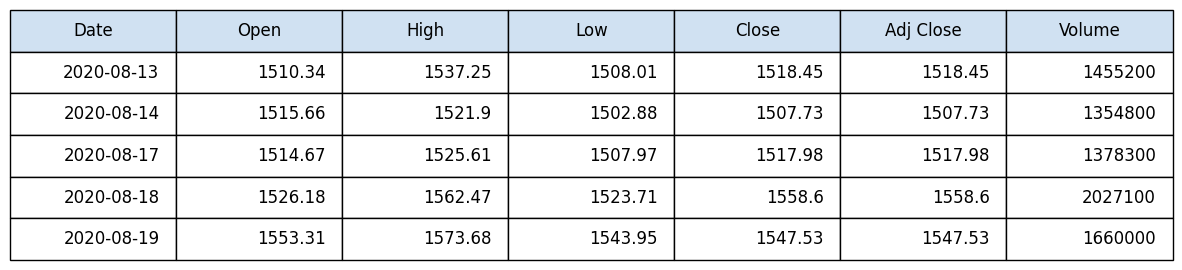

In [49]:
plt.figure(linewidth=2, tight_layout={'pad':.5}, figsize=(5,3))
axes_8 = plt.gca()
axes_8.get_xaxis().set_visible(False)
axes_8.get_yaxis().set_visible(False)
plt.box(on=None)
ccolors = plt.cm.Blues(np.full(len(col_head), 0.2))
#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
the_table = plt.table(cellText=stk_data_np, loc='center', colLabels=col_head,colColours=ccolors)
the_table.set_fontsize(12)
the_table.scale(3, 2.5)

#Scatterplots

In [50]:
cnt_arr = np.array(['Australia','Brazil','Canada','Chile','France','Germany','Greece',
                   'Iceland','India','Iran','Italy','Mexico','New Zealand','Nigeria',
                   'Norway','Pakistan','Peru','Russia','Saudi Arabia','Singapore',
                   'South Africa','Spain','Sweden','Turkey','UK','US'])
dr_arr = np.array([1.8,53,24.5,56.5,45.4,11.2,2.2,
                   2.8,4,24.6,58.6,46.3,.5,.5,
                   4.9,2.9,83.3,11,10.4,.5,
                   21.5,61.6,56.9,7.3,62.4,52.9])
test_arr = np.array([110,7197,600,1862,1636,1103,35,
                   10,295,1658,1226,2490,8,243,
                   48,1395,1101,4447,1443,280,
                   2830,1602,447,1205,1546,24988])
cc_arr = np.array([24236,3456652,125408,390037,256534,229706,7684,
                   2035,2836925,350279,255278,537031,1654,50488,
                   10162,290445,549321,935066,302686,56031,
                   596060,370867,85411,253108,323008,5529824])
print(cnt_arr.size)
print(dr_arr.size)
print(test_arr.size)
print(cc_arr.size)

26
26
26
26


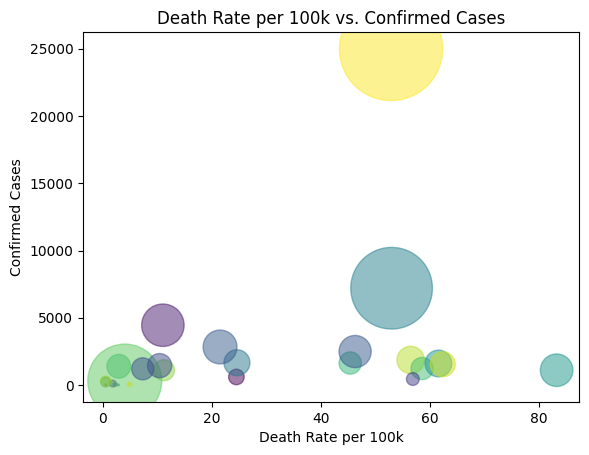

In [52]:
cc_arr_sm = cc_arr / 1000
color_arr = np.random.rand(26)

plt.title('Death Rate per 100k vs. Confirmed Cases')
plt.xlabel('Death Rate per 100k')
plt.ylabel('Confirmed Cases')
plt.scatter(dr_arr,test_arr,s=cc_arr_sm,c=color_arr,alpha=0.5)

#3D Surface

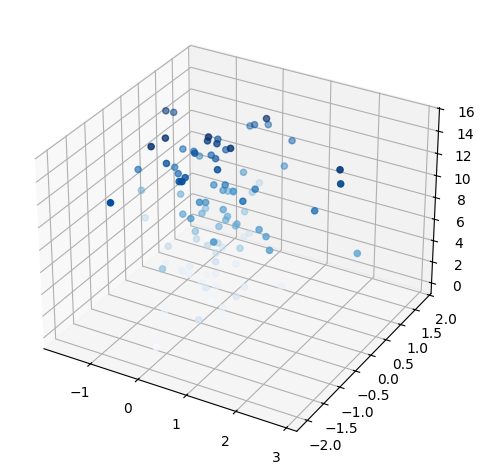

In [53]:
from mpl_toolkits import mplot3d
fig_9 = plt.figure(figsize=(8,5),dpi=100)
axes_9 = fig_9.add_axes([0.1,0.1,0.9,0.9], projection='3d')
z_3 = 15 * np.random.random(100)
x_3 = np.sin(z_3) * np.random.randn(100)
y_3 = np.cos(z_3) * np.random.randn(100)
axes_9.scatter3D(x_3, y_3, z_3, c=z_3, cmap='Blues')

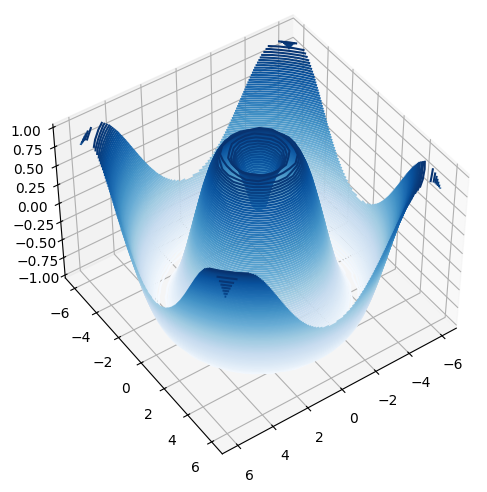

In [58]:
fig_9 = plt.figure(figsize=(8,5),dpi=100)
axes_9 = fig_9.add_axes([0.1,0.1,0.9,0.9], projection='3d')
def get_z(x, y):
    return np.sin(np.sqrt(x**2 + y**2))
x_4 = np.linspace(-6, 6, 30)
y_4 = np.linspace(-6, 6, 30)
x_4, y_4 = np.meshgrid(x_4, y_4)
z_4 = get_z(x_4,y_4)
axes_9.view_init(45,55)
axes_9.contour3D(x_4,y_4,z_4,80,cmap='Blues')

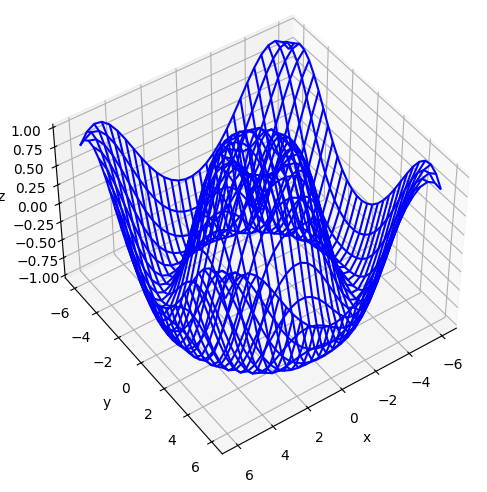

In [61]:
fig_9 = plt.figure(figsize=(8,5),dpi=100)
axes_9 = fig_9.add_axes([0.1,0.1,0.9,0.9], projection='3d')
def get_z(x, y):
    return np.sin(np.sqrt(x**2 + y**2))
x_4 = np.linspace(-6, 6, 30)
y_4 = np.linspace(-6, 6, 30)
x_4, y_4 = np.meshgrid(x_4, y_4)
z_4 = get_z(x_4,y_4)
axes_9.view_init(45,55)
axes_9.set_xlabel('x')
axes_9.set_ylabel('y')
axes_9.set_zlabel('z')
axes_9.plot_wireframe(x_4,y_4,z_4,color='blue')

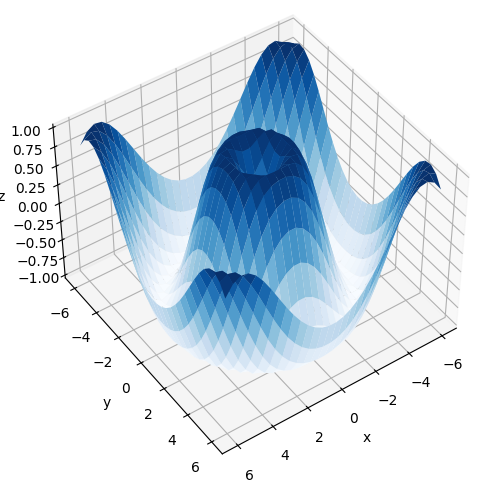

In [62]:
fig_9 = plt.figure(figsize=(8,5),dpi=100)
axes_9 = fig_9.add_axes([0.1,0.1,0.9,0.9], projection='3d')
def get_z(x, y):
    return np.sin(np.sqrt(x**2 + y**2))
x_4 = np.linspace(-6, 6, 30)
y_4 = np.linspace(-6, 6, 30)
x_4, y_4 = np.meshgrid(x_4, y_4)
z_4 = get_z(x_4,y_4)
axes_9.view_init(45,55)
axes_9.set_xlabel('x')
axes_9.set_ylabel('y')
axes_9.set_zlabel('z')
axes_9.plot_surface(x_4,y_4,z_4, rstride=1, cstride=1,cmap='Blues',edgecolor='none')

#Matplotlib Finance

In [64]:
import sys
!{sys.executable} -m pip install mplfinance
import mplfinance as mpf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 4.6 MB/s eta 0:00:00


In [74]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

file_path = "GOOG.csv"

goog_data = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "abdalrahmanshahrour/googcsv",
  file_path
)

goog_data['Date'] = pd.to_datetime(goog_data['Date'])
goog_data = goog_data.set_index('Date')

print(goog_data.sample(5))

Using Colab cache for faster access to the 'googcsv' dataset.
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-06-17  1447.160034  1460.000000  1431.380005  1451.119995  1451.119995   
2020-05-29  1416.939941  1432.569946  1413.349976  1428.920044  1428.920044   
2020-07-29  1506.319946  1531.251953  1501.329956  1522.020020  1522.020020   
2020-06-04  1430.400024  1438.959961  1404.729980  1412.180054  1412.180054   
2020-05-22  1396.709961  1412.760010  1391.829956  1410.420044  1410.420044   

             Volume  
Date                 
2020-06-17  1548300  
2020-05-29  1838100  
2020-07-29  1106500  
2020-06-04  1484300  
2020-05-22  1309400  


In [75]:
goog_data.shape

(64, 6)

In [76]:
goog_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-20,1389.579956,1410.420044,1387.250000,1406.719971,1406.719971,1655400
2020-05-21,1408.000000,1415.489990,1393.449951,1402.800049,1402.800049,1385000
2020-05-22,1396.709961,1412.760010,1391.829956,1410.420044,1410.420044,1309400
2020-05-26,1437.270020,1441.000000,1412.130005,1417.020020,1417.020020,2060600
2020-05-27,1417.250000,1421.739990,1391.290039,1417.839966,1417.839966,1685800


In [77]:
goog_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64 entries, 2020-05-20 to 2020-08-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       64 non-null     float64
 1   High       64 non-null     float64
 2   Low        64 non-null     float64
 3   Close      64 non-null     float64
 4   Adj Close  64 non-null     float64
 5   Volume     64 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 3.5 KB


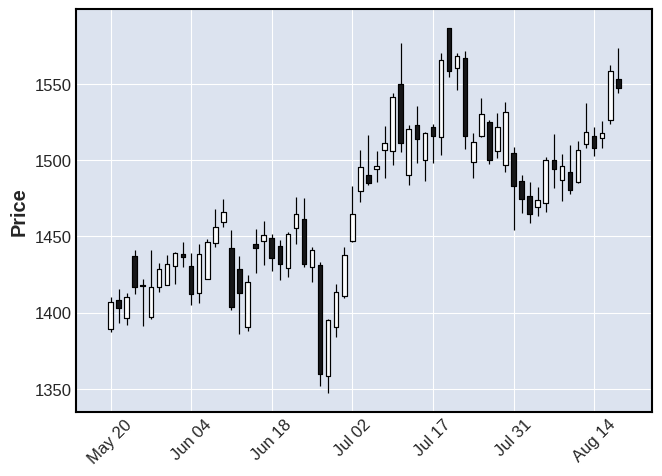

In [79]:
mpf.plot(goog_data,type='candle')

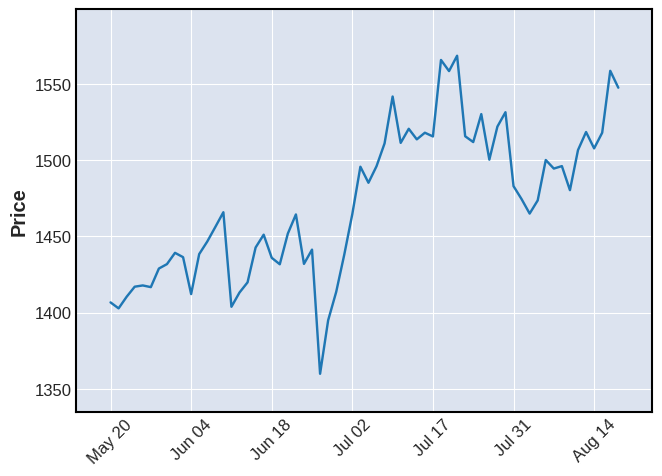

In [80]:
mpf.plot(goog_data,type='line')

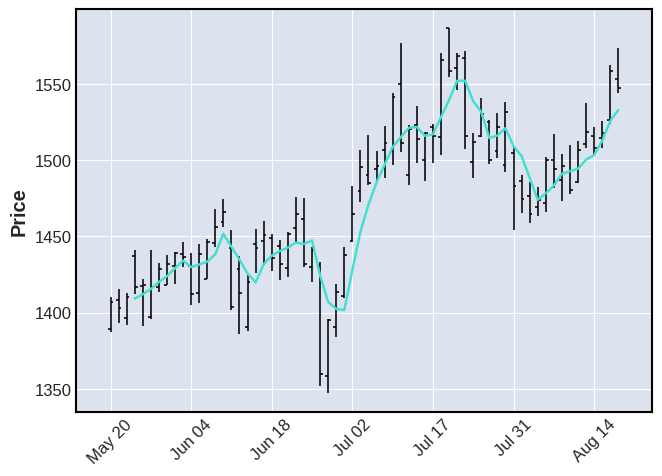

In [81]:
mpf.plot(goog_data,type='ohlc',mav=4)

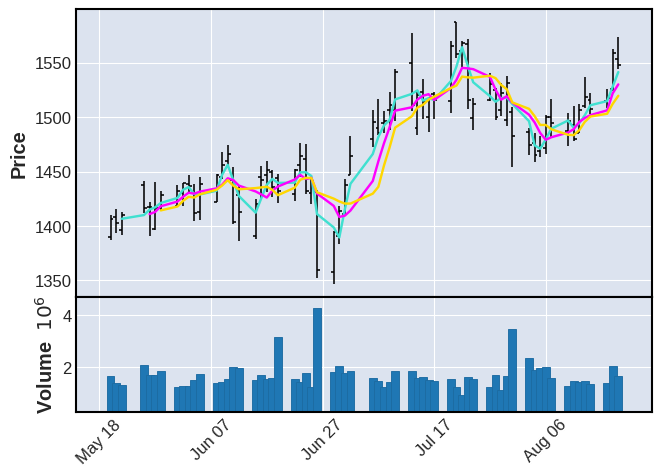

In [82]:
mpf.plot(goog_data,type='ohlc',mav=(3,5,7),volume=True,show_nontrading=True)

#Heatmaps

In [83]:
symptoms = ["Coronavirus","Influenza","Pneumonia","Dyspnea"]
dates = ["Jun28","Jul05","Jul12","Jul19","Jul26","Aug02","Aug09","Aug16","Aug21"]
symp_per = np.array([[5.2, 5.5, 5.7, 5.6, 5.3, 5.1, 5.0, 4.9, 5.3],
                    [3.5, 4.0, 4.3, 3.9, 3.5, 3.2, 2.7, 2.2, 2.0],
                    [1.8, 2.2, 2.3, 2.2, 2.1, 1.9, 1.7, 1.4, 1.3],
                    [1.0, 1.1, 1.1, 1.0, 0.9, 0.8, 0.8, 0.8, 0.7]])

In [87]:
len(dates)

9

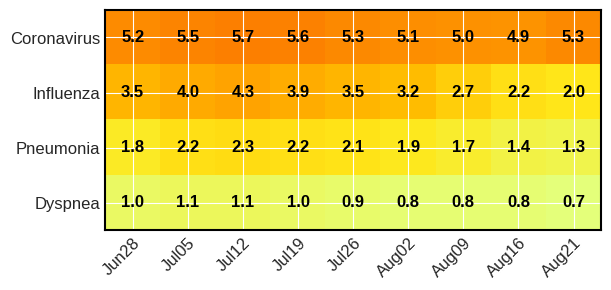

In [103]:
fig_10, axes_10 = plt.subplots()
im = axes_10.imshow(symp_per, cmap="Wistia")
axes_10.set_xticks(np.arange(len(dates)))
axes_10.set_yticks(np.arange(len(symptoms)))
axes_10.set_xticklabels(dates)
axes_10.set_yticklabels(symptoms)
plt.setp(axes_10.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
for i in range(len(symptoms)):
    for j in range(len(dates)):
        text = axes_10.text(j, i, symp_per[i, j], ha="center", va="center", color="k",fontweight="bold")